# Matplotlib Overview
* multi-platform data visualization library built on NumPy arrays
* designed to work with SciPy stack

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

## Styles
* use plt.style
* can be adjusted as needed

In [2]:
plt.style.use('classic')

## Graphics Embedding
* %matplotlib notebook - provides interactive plots
* %matplotlib inline - provides static plot images

In [3]:
%matplotlib inline

* Example:

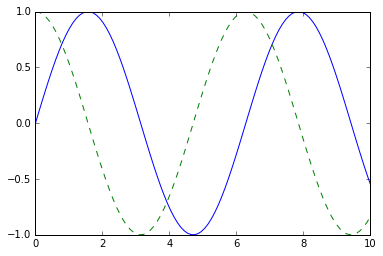

In [4]:
import numpy as np

x = np.linspace(0,10,100)

fig = plt.figure()

plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--');

#### This image could be saved - using fig.savefig( )
* many different file formats are supported

In [5]:
fig.canvas.get_supported_filetypes()

{'ps': 'Postscript',
 'eps': 'Encapsulated Postscript',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}

## Interfaces
* MATLAB-style - using plt
* Object-oriented - using fig, axes

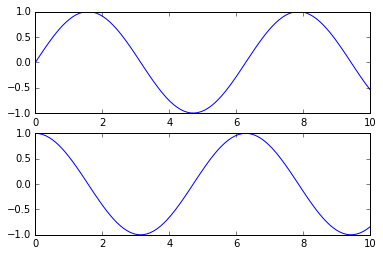

In [6]:
plt.figure()

# (rows,columns,panel number)

plt.subplot(2,1,1) 
plt.plot(x, np.sin(x))

# 2nd panel with current axis

plt.subplot(2,1,2)
plt.plot(x, np.cos(x));

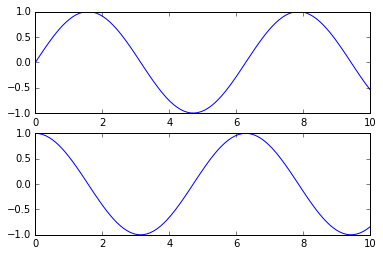

In [7]:
# grid of plots - ax is array of 2 axes objects

fig, ax = plt.subplots(2)

ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x));

# Line Plots

In [8]:
plt.style.use('seaborn-whitegrid')

#### Create a blank plot

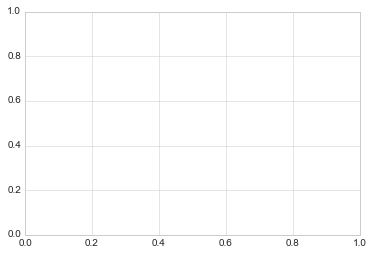

In [9]:
fig = plt.figure()
ax = plt.axes()

#### Figure
* instance of class plt.Figure
* container holding all objects representing axes, graphics, text, labels

#### Axes
* bounding box with ticks and labels (above)
* eventually holds the plot elements for the visualization

#### Plot using ax.plot( )

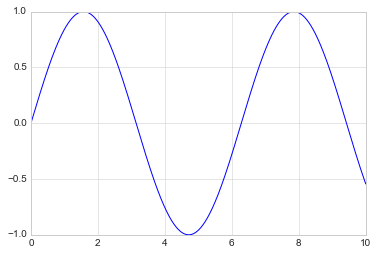

In [10]:
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0,10,1000)
ax.plot(x, np.sin(x));

#### Can also use plt.plot( )
* adjusting line colors and styles

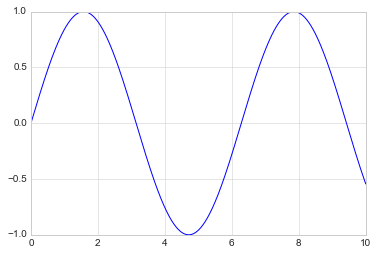

In [11]:
plt.plot(x, np.sin(x));

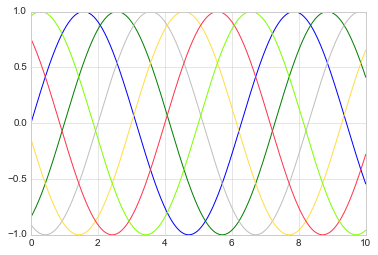

In [12]:
plt.plot(x, np.sin(x-0), color='blue')          # color name
plt.plot(x, np.sin(x-1), color='g')             # color code (rgbcmyk)
plt.plot(x, np.sin(x-2), color='0.75')          # grayscale (0 to 1)
plt.plot(x, np.sin(x-3), color='#FFDD44')       # Hex code (RRGGBB - 00 to FF)
plt.plot(x, np.sin(x-4), color=(1.0,0.2,0.3))   # rgb tuple (0 to 1)
plt.plot(x, np.sin(x-5), color='chartreuse');   # HTML color names

* if no color provided, matplotlib will shift through default options
* adjust line styles - using linestyle=

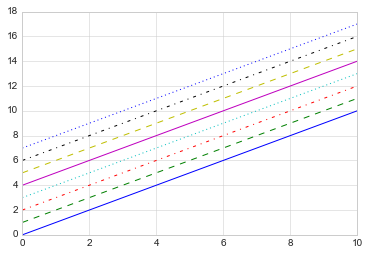

In [14]:
plt.plot(x, x+0, linestyle='solid')
plt.plot(x, x+1, linestyle='dashed')
plt.plot(x, x+2, linestyle='dashdot')
plt.plot(x, x+3, linestyle='dotted');

plt.plot(x, x+4, linestyle='-')
plt.plot(x, x+5, linestyle='--')
plt.plot(x, x+6, linestyle='-.')
plt.plot(x, x+7, linestyle=':');

#### Adjust Axes Limits

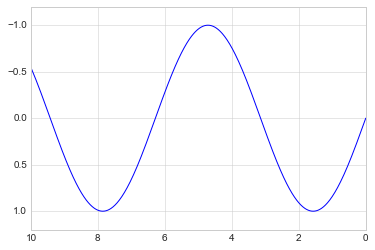

In [15]:
plt.plot(x, np.sin(x))

plt.xlim(10,0)
plt.ylim(1.2,-1.2);

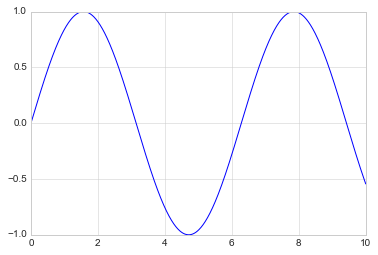

In [16]:
plt.plot(x, np.sin(x))
plt.axis('tight');

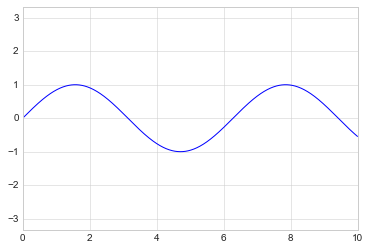

In [17]:
plt.plot(x, np.sin(x))
plt.axis('equal');

# Scatter Plots
* with plt.plot
* with plt.scatter

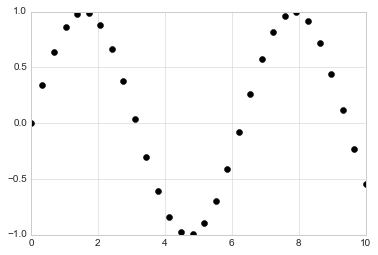

In [18]:
x = np.linspace(0,10,30)
y = np.sin(x)

plt.plot(x,y,'o',color='black');

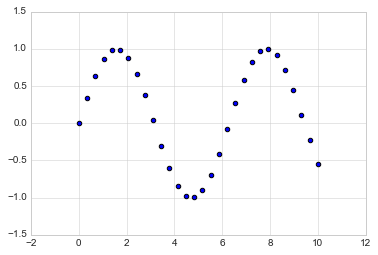

In [21]:
plt.scatter(x, y, marker='o');

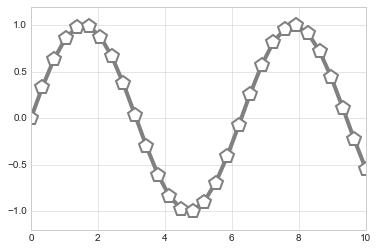

In [19]:
plt.plot(x, y, '-p', color='gray',
        markersize=15, linewidth=4,
        markerfacecolor='white',
        markeredgecolor='gray',
        markeredgewidth=2)
plt.ylim(-1.2,1.2);

#### There are a number of various marker types available

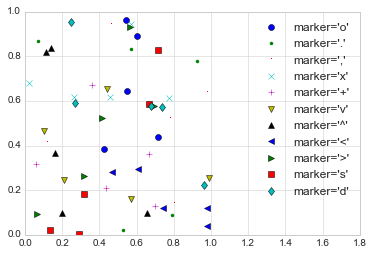

In [20]:
rng = np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(5), rng.rand(5), marker,
            label="marker='{0}'".format(marker))
plt.legend(numpoints=1)
plt.xlim(0,1.8);

#### alpha= adjusts the transparency level

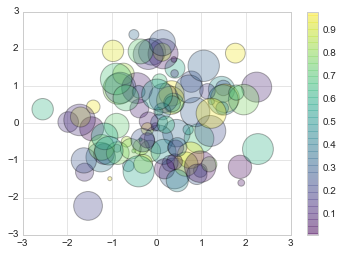

In [22]:
rng = np.random.RandomState(0)

x = rng.randn(100)
y = rng.randn(100)

colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3, cmap='viridis')
plt.colorbar();

#### Add labels with plt.xlabel( ), plt.ylabel( )

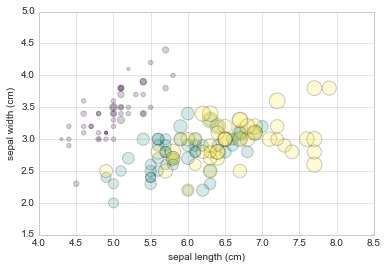

In [23]:
from sklearn.datasets import load_iris

iris = load_iris()
features = iris.data.T

plt.scatter(features[0], features[1], alpha=0.2,
           s=100*features[3], c=iris.target, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1]);

# Plotting Error
* errorbars

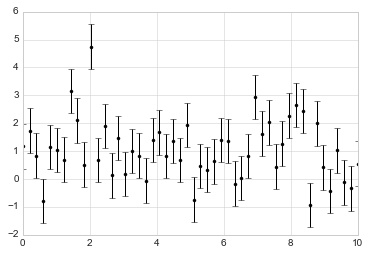

In [24]:
x = np.linspace(0,10,50)
dy = 0.8
y = np.sin(x) + dy + np.random.randn(50)

plt.errorbar(x,y,yerr=dy,fmt='.k');

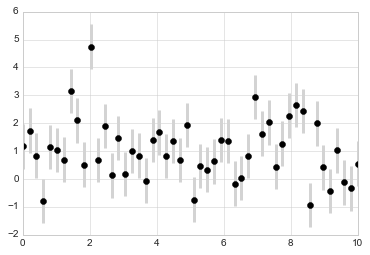

In [25]:
plt.errorbar(x,y,yerr=dy,fmt='o', color='black', ecolor='lightgray', elinewidth=3, capsize=0);

#### Contiuous Errors
* combine plt.plot and plt.fill_between

In [26]:
from sklearn.gaussian_process import GaussianProcess

model = lambda x: x * np.sin(x)

xdata = np.array([1,3,5,6,8])
ydata = model(xdata)

gp = GaussianProcess(corr='cubic', theta0=1e-2, thetaL=1e-4, thetaU=1E-1,
                    random_start=100)
gp.fit(xdata[:, np.newaxis], ydata)

xfit = np.linspace(0,10,1000)
yfit, MSE = gp.predict(xfit[:, np.newaxis], eval_MSE=True)
dyfit = 2 * np.sqrt(MSE)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class GaussianProcess is deprecated; GaussianProcess was deprecated in version 0.18 and will be removed in 0.20. Use the GaussianProcessRegressor instead.
  warnings.warn(msg, category=DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function l1_cross_distances is deprecated; l1_cross_distances was deprecated in version 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function constant is deprecated; The function constant of regression_models is deprecated in version 0.19.1 and will be removed in 0.22.
  warnings.warn(msg, category=DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function cubic is deprecated; The function cubic of correlation_mode

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function cubic is deprecated; The function cubic of correlation_models is deprecated in version 0.19.1 and will be removed in 0.22.
  warnings.warn(msg, category=DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function cubic is deprecated; The function cubic of correlation_models is deprecated in version 0.19.1 and will be removed in 0.22.
  warnings.warn(msg, category=DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function cubic is deprecated; The function cubic of correlation_models is deprecated in version 0.19.1 and will be removed in 0.22.
  warnings.warn(msg, category=DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function cubic is deprecated; The function cubic of correlation_models is deprecated i

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function cubic is deprecated; The function cubic of correlation_models is deprecated in version 0.19.1 and will be removed in 0.22.
  warnings.warn(msg, category=DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function cubic is deprecated; The function cubic of correlation_models is deprecated in version 0.19.1 and will be removed in 0.22.
  warnings.warn(msg, category=DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function cubic is deprecated; The function cubic of correlation_models is deprecated in version 0.19.1 and will be removed in 0.22.
  warnings.warn(msg, category=DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function cubic is deprecated; The function cubic of correlation_models is deprecated i

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function cubic is deprecated; The function cubic of correlation_models is deprecated in version 0.19.1 and will be removed in 0.22.
  warnings.warn(msg, category=DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function cubic is deprecated; The function cubic of correlation_models is deprecated in version 0.19.1 and will be removed in 0.22.
  warnings.warn(msg, category=DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function cubic is deprecated; The function cubic of correlation_models is deprecated in version 0.19.1 and will be removed in 0.22.
  warnings.warn(msg, category=DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function cubic is deprecated; The function cubic of correlation_models is deprecated i

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function cubic is deprecated; The function cubic of correlation_models is deprecated in version 0.19.1 and will be removed in 0.22.
  warnings.warn(msg, category=DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function cubic is deprecated; The function cubic of correlation_models is deprecated in version 0.19.1 and will be removed in 0.22.
  warnings.warn(msg, category=DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function cubic is deprecated; The function cubic of correlation_models is deprecated in version 0.19.1 and will be removed in 0.22.
  warnings.warn(msg, category=DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function cubic is deprecated; The function cubic of correlation_models is deprecated i

* visualize the result

(0, 10)

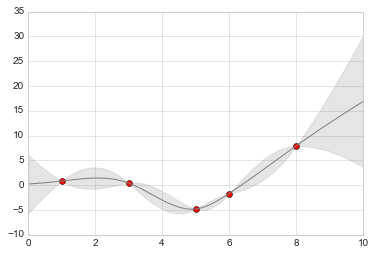

In [27]:
plt.plot(xdata, ydata, 'or')
plt.plot(xfit, yfit, '-', color='gray')

plt.fill_between(xfit, yfit - dyfit, yfit + dyfit, color='gray', alpha=0.2)
plt.xlim(0,10)

# Density and Contour
* visualizing a 3-Dimensional function

In [28]:
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

* np.meshgrid can be helpful
    * when x and y represent positions, and z represents contour

In [31]:
x = np.linspace(0,5,50)
y = np.linspace(0,5,40)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

* plt.contour( )

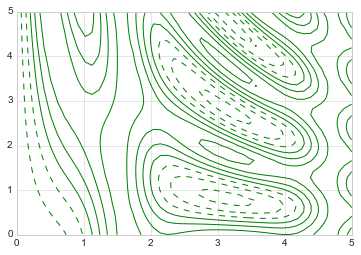

In [32]:
plt.contour(X, Y, Z, colors='green');

* negative lines above are dotted lines
* these values can be color coded using cmap

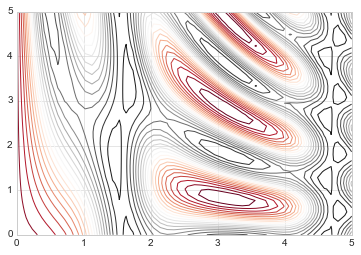

In [33]:
plt.contour(X, Y, Z, 20, cmap='RdGy');

* use a filled contour with plt.contourf( )

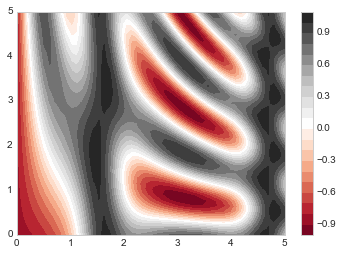

In [34]:
plt.contourf(X,Y,Z,20,cmap='RdGy')
plt.colorbar();